In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
df.shape

(1436, 11)

In [8]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [13]:
df.duplicated().sum()

1

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

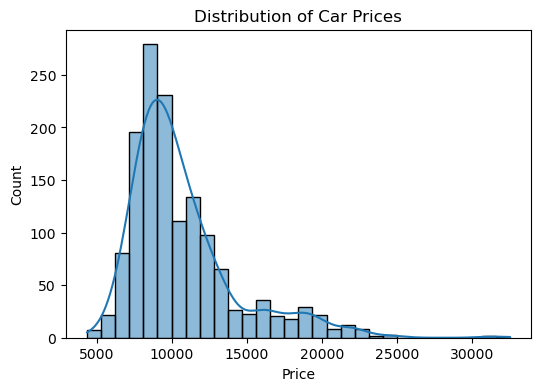

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.show()

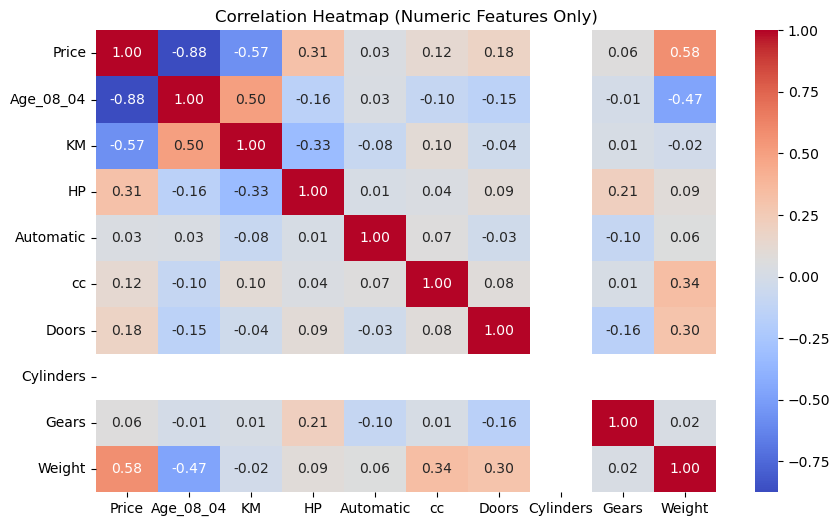

In [20]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [21]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [26]:
categorical = ["Fuel_Type"]
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(drop="first"), categorical)
])

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}\n")
    return [name, r2, rmse, mae]

results = []

In [29]:
# Model 1: Full MLR (all features)
mlr_full = Pipeline([("preprocessor", preprocessor),
                     ("regressor", LinearRegression())])
mlr_full.fit(X_train, y_train)
results.append(evaluate(mlr_full, X_test, y_test, "MLR - Full Model"))

MLR - Full Model Results:
  R² Score: 0.8203
  RMSE: 1468.21
  MAE: 986.50



In [32]:
# Model 2: Reduced MLR (drop weak predictors like Doors, CC)
X_reduced = df.drop(["Price", "Doors", "cc"], axis=1)
y_reduced = df["Price"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=42
)

categorical_r = ["Fuel_Type"]
numerical_r = [col for col in X_reduced.columns if col not in categorical_r]

preprocessor_r = ColumnTransformer([
    ("num", StandardScaler(), numerical_r),
    ("cat", OneHotEncoder(drop="first"), categorical_r)
])

mlr_reduced = Pipeline([("preprocessor", preprocessor_r),
                        ("regressor", LinearRegression())])
mlr_reduced.fit(X_train_r, y_train_r)
results.append(evaluate(mlr_reduced, X_test_r, y_test_r, "MLR - Reduced Model"))

MLR - Reduced Model Results:
  R² Score: 0.8237
  RMSE: 1454.21
  MAE: 985.10



In [33]:
# Model 3: Feature Selection MLR (top predictors by correlation)
top_features = ["Age_08_04", "KM", "HP", "Weight", "Fuel_Type"]  # chosen manually
X_selected = df[top_features]
y_selected = df["Price"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

categorical_s = ["Fuel_Type"]
numerical_s = [col for col in X_selected.columns if col not in categorical_s]

preprocessor_s = ColumnTransformer([
    ("num", StandardScaler(), numerical_s),
    ("cat", OneHotEncoder(drop="first"), categorical_s)
])

mlr_selected = Pipeline([("preprocessor", preprocessor_s),
                         ("regressor", LinearRegression())])
mlr_selected.fit(X_train_s, y_train_s)
results.append(evaluate(mlr_selected, X_test_s, y_test_s, "MLR - Selected Features"))


MLR - Selected Features Results:
  R² Score: 0.8201
  RMSE: 1468.92
  MAE: 985.54



In [34]:
ridge = Pipeline([("preprocessor", preprocessor),
                  ("regressor", Ridge(alpha=1.0))])
ridge.fit(X_train, y_train)
results.append(evaluate(ridge, X_test, y_test, "Ridge Regression"))

lasso = Pipeline([("preprocessor", preprocessor),
                  ("regressor", Lasso(alpha=0.01, max_iter=10000))])
lasso.fit(X_train, y_train)
results.append(evaluate(lasso, X_test, y_test, "Lasso Regression"))

Ridge Regression Results:
  R² Score: 0.8208
  RMSE: 1466.10
  MAE: 986.82

Lasso Regression Results:
  R² Score: 0.8203
  RMSE: 1468.17
  MAE: 986.49




Model Comparison:
                      Model        R2         RMSE         MAE
0         MLR - Full Model  0.820321  1468.205829  986.496688
1      MLR - Reduced Model  0.823732  1454.206051  985.104613
2  MLR - Selected Features  0.820148  1468.915026  985.541920
3         Ridge Regression  0.820837  1466.099313  986.820341
4         Lasso Regression  0.820331  1468.166248  986.490805


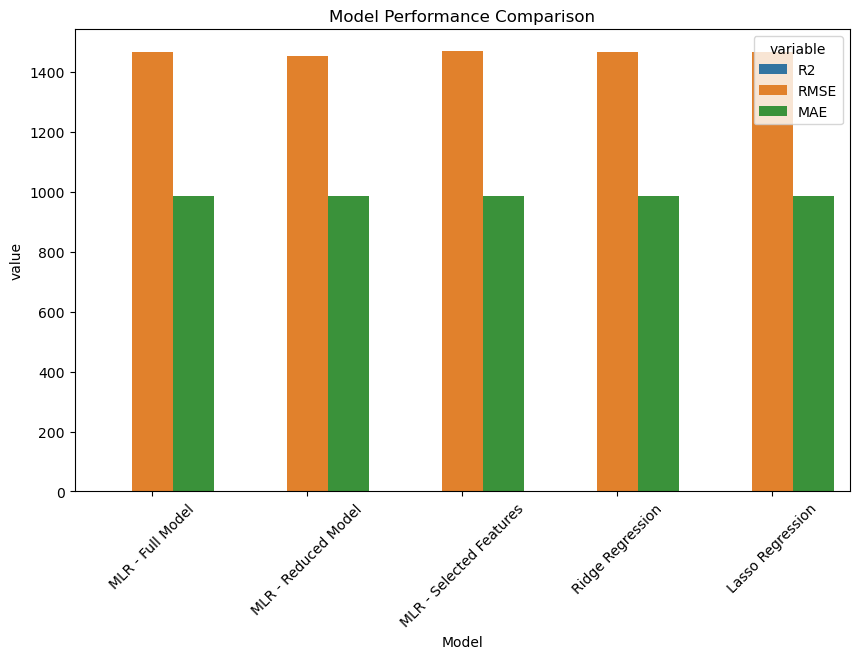

In [35]:
results_df = pd.DataFrame(results, columns=["Model","R2","RMSE","MAE"])
print("\nModel Comparison:\n", results_df)

plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["R2","RMSE","MAE"]),
            x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

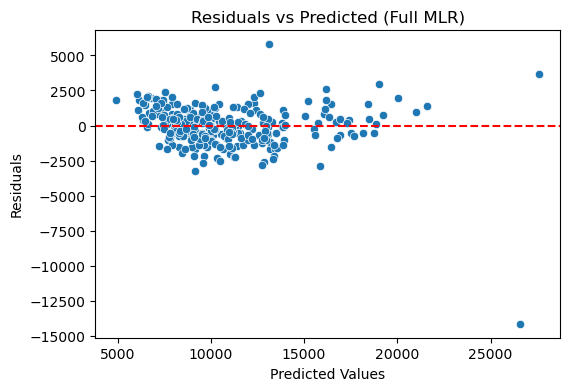

In [36]:
y_pred = mlr_full.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted (Full MLR)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()